**Import Library**

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

**Mempersiapkan Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
base_dir = '/content/gdrive/MyDrive/TRASH'
os.listdir(base_dir)

['Validation', 'Testing', 'Train']

In [ ]:
train_ds="/content/gdrive/MyDrive/TRASH/Train"
val_ds="/content/gdrive/MyDrive/TRASH/Validation"
test_ds="/content/gdrive/MyDrive/TRASH/Testing"

**Preprocessing**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=10,
    horizontal_flip=True,
    )
val_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=10,
    horizontal_flip=True,
    )
test_datagen = ImageDataGenerator(
    rescale=1./255,
    )

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_ds,
        target_size=(224, 224),
        shuffle=True,
        color_mode="rgb",
        batch_size=32,
        class_mode='categorical')

Found 4300 images belonging to 3 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
    val_ds,
    target_size=(224,224),
    shuffle=False,
    color_mode="rgb",
    batch_size=32,
    class_mode='categorical')

Found 750 images belonging to 3 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_ds,
    target_size=(224,224),
    shuffle=False,
    batch_size=32,
    class_mode='categorical')

Found 300 images belonging to 3 classes.


**Merancang model CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membangun model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax'))

# Compiling model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

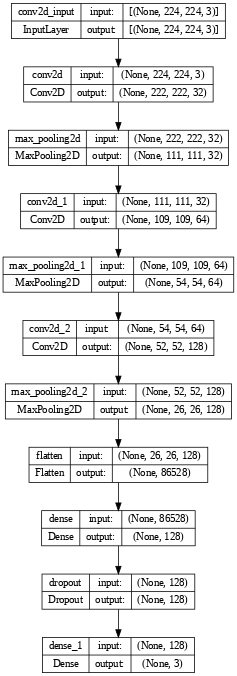

In [ ]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

**Pelatihan Model**

In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n / train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n / validation_generator.batch_size,
    verbose=1
)

Epoch 1/50
 11/134 [=>............................] - ETA: 11:16 - loss: 1.5675 - accuracy: 0.3892

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


134/134 [==============================] - 1008s 7s/step - loss: 0.9469 - accuracy: 0.5365 - val_loss: 0.7466 - val_accuracy: 0.6080
Epoch 2/50
134/134 [==============================] - 83s 618ms/step - loss: 0.8246 - accuracy: 0.6100 - val_loss: 0.7335 - val_accuracy: 0.6573
Epoch 3/50
134/134 [==============================] - 85s 631ms/step - loss: 0.7888 - accuracy: 0.6279 - val_loss: 0.6752 - val_accuracy: 0.7240
Epoch 4/50
134/134 [==============================] - 82s 614ms/step - loss: 0.7570 - accuracy: 0.6528 - val_loss: 0.7212 - val_accuracy: 0.6653
Epoch 5/50
134/134 [==============================] - 83s 620ms/step - loss: 0.7333 - accuracy: 0.6560 - val_loss: 0.6011 - val_accuracy: 0.7267
Epoch 6/50
134/134 [==============================] - 84s 625ms/step - loss: 0.7240 - accuracy: 0.6688 - val_loss: 0.5924 - val_accuracy: 0.7493
Epoch 7/50
134/134 [==============================] - 83s 616ms/step - loss: 0.6933 - accuracy: 0.6881 - val_loss: 0.5236 - val_accuracy: 0.77

In [ ]:
loss, acc = model.evaluate(validation_generator,verbose=0)
print('Accuracy on validating data: ',round(acc*100),'% \nLoss on validating data: {:.4f}'.format(loss),'\n')

Accuracy on validating data:  96 % 
Loss on validating data: 0.0939 



In [ ]:
print('Akurasi training : ',round(max(hist.history['accuracy'])*100),'%')
print('Akurasi validation : ',round(max(hist.history['val_accuracy'])*100),'%')

Akurasi training :  96 %
Akurasi validation :  98 %


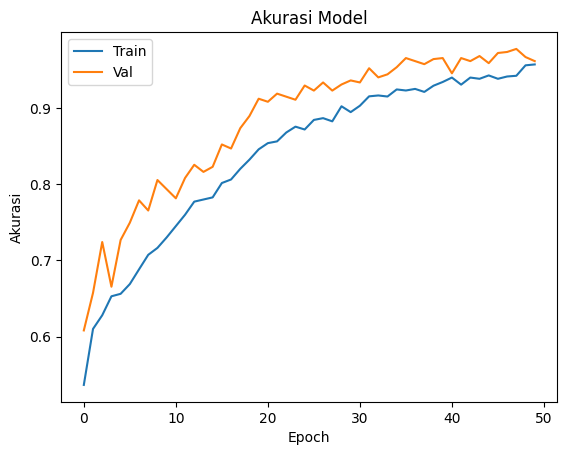

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

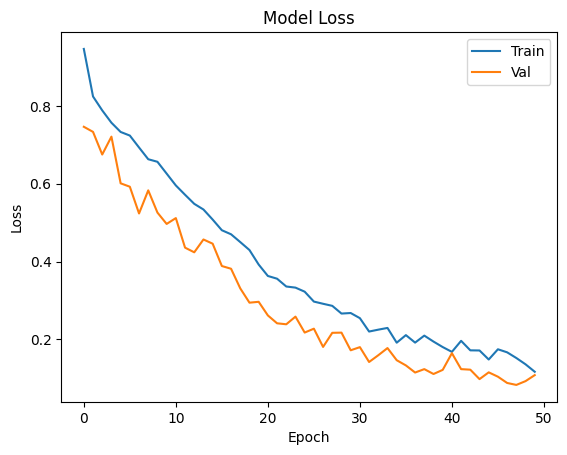

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [ ]:
import numpy as np
test_steps_per_epoch = np.math.ceil(test_generator.n / test_generator.batch_size )
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

<ipython-input-17-a5a798c26ce5>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)


In [ ]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 14s 1s/step - loss: 0.3093 - accuracy: 0.9433


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Klasifikasi Report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Akurasi, Precision, Recall, F1-Score
accuracy = accuracy_score(true_classes, predicted_classes)
print("\nAccuracy   :", accuracy)
precision = precision_score(true_classes, predicted_classes,average='macro')
print("Precision :", precision)
recall = recall_score(true_classes, predicted_classes,average='macro')
print("Recall    :", recall)
F1_score = f1_score(true_classes, predicted_classes,average='macro')
print("F1-score  :",F1_score)

              precision    recall  f1-score   support

   Anorganik       0.91      0.96      0.94       100
 Beracun(B3)       0.97      0.91      0.94       100
     Organik       0.95      0.96      0.96       100

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300


Accuracy   : 0.9433333333333334
Precision : 0.9442886233912144
Recall    : 0.9433333333333334
F1-score  : 0.9433178587825268


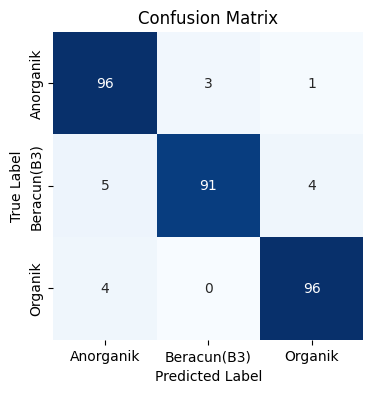

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar = False,
            xticklabels = class_labels,
            yticklabels = class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Testing Klasifikasi**

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn

Saving WhatsApp Image 2023-08-08 at 12.30.19.jpg to WhatsApp Image 2023-08-08 at 12.30.19.jpg


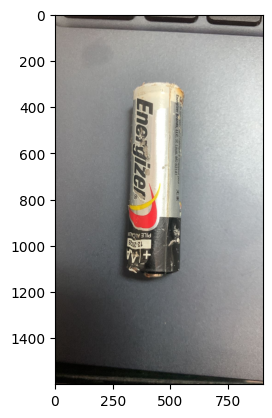

In [ ]:
new_image = plt.imread(path)
img = plt.imshow(new_image)

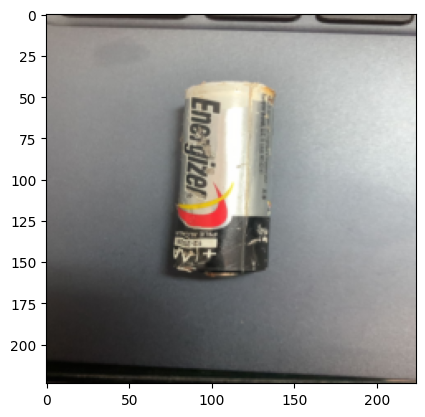

In [ ]:
from skimage.transform import resize
resized_image = resize(new_image, (224,224,3))
img = plt.imshow(resized_image)

In [ ]:
predictions = model.predict(np.array([resized_image]))
predictions

1/1 [==============================] - 0s 214ms/step


array([[7.0664915e-03, 9.9293023e-01, 3.3583503e-06]], dtype=float32)

In [ ]:
classification = ['Anorganik', 'Beracun (B3)', 'Organik' ]
list_index = [0, 1, 2]

for i in range(len(list_index)):
    label = classification[list_index[i]]
    probability = predictions[0][list_index[i]] * 100
    print(label, ':', round(probability, 2), '%')


Anorganik : 0.71 %
Beracun (B3) : 99.29 %
Organik : 0.0 %


In [ ]:
list_index = [0,1,2]
x = predictions

for i in range(3):
  for j in range(3):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

if list_index == [0,1,2] or list_index == [0,2,1]:
  print('Sampah Anorganik')
elif list_index == [1,2,0] or list_index == [1,0,2]:
  print('Sampah Beracun (B3)')
elif list_index == [2,1,0] or list_index == [2,0,1]:
  print('Sampah Organik')

img = plt.imshow(resized_image)

In [ ]:
# Evaluate the model on the training set
steps_per_epoch = np.math.ceil(test_generator.n / test_generator.batch_size)
predictions = model.predict_generator(test_generator, steps=steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

<ipython-input-33-1a9261714291>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=steps_per_epoch)


In [ ]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

In [ ]:
# Assuming you have the true classes and predicted scores
true_classes = test_generator.classes
predictions = model.predict_generator(test_generator)

<ipython-input-35-6bd7776505c4>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


In [ ]:
# Compute the AUC-ROC for each class
import sklearn.metrics as metrics
num_classes = len(class_labels)
auc_roc_scores = []
for i in range(num_classes):
    true_class = (true_classes == i).astype(int)
    pred_scores = predictions[:, i]
    auc = metrics.roc_auc_score(true_class, pred_scores)
    auc_roc_scores.append(auc)

# Print the AUC-ROC scores for each class
for i in range(num_classes):
    print(f"Class '{class_labels[i]}': AUC-ROC = {auc_roc_scores[i]}")

Class 'Anorganik': AUC-ROC = 0.98485
Class 'Beracun(B3)': AUC-ROC = 0.9808
Class 'Organik': AUC-ROC = 0.9913


In [ ]:
# Assuming you have the true classes and predicted classes
true_classes = test_generator.classes
predictions = model.predict_generator(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(true_classes, predicted_classes)

# Print the confusion matrix
print(confusion_matrix)

<ipython-input-37-0d336310a637>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


[[96  3  1]
 [ 5 91  4]
 [ 4  0 96]]
